## Importing data and libraries required

In [ ]:
###  importing the required libraries 

import os 
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
os.chdir(r'C:\Users\guthu\Desktop\stock_prediction')

In [3]:
### importing the data(csv file) from the directory

df = pd.read_csv("GOOGL.csv")

## Data preprocessing and scaling the data

In [18]:
### first 5 rows of the imported dataset
df.head() 

,Date,Open,High,Low,Close,Adj Close,Volume
0,16-08-2004,50.050049,54.594597,48.028027,54.209209,54.209209,67493439
1,23-08-2004,55.430431,56.796799,51.836838,53.128128,53.128128,55998745
2,30-08-2004,52.692692,52.797798,49.519520,50.055054,50.055054,39524036
3,06-09-2004,50.555557,53.333332,49.854855,52.717716,52.717716,23593782
4,13-09-2004,53.368366,58.803802,53.283283,58.803802,58.803802,48125026


In [13]:
### Separating stock close price data from the current dataset

df1=df.reset_index()['Close']

In [19]:
### First 5 rows of stock close price 

df1.head()

0    54.209209
1    53.128128
2    50.055054
3    52.717716
4    58.803802
Name: Close, dtype: float64

Text(0, 0.5, 'Price')

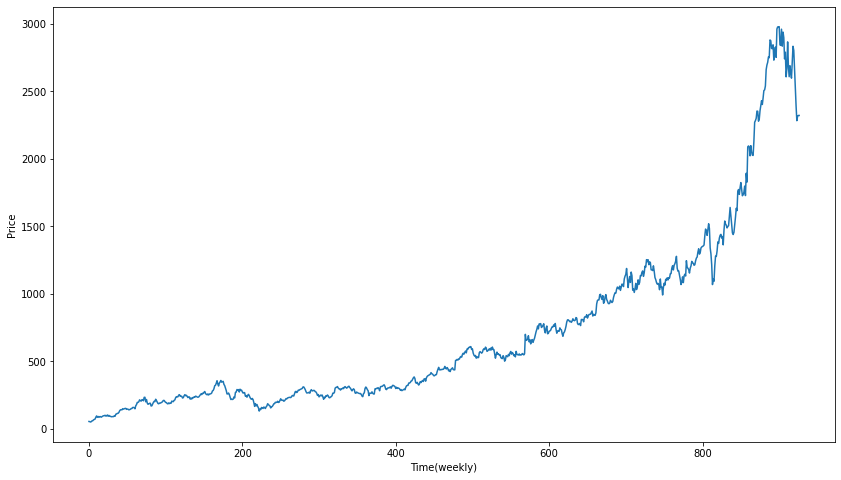

In [20]:
### plotting the graph for time(weekly) against price for the stock close price index

plt.figure(figsize=(14,8))
plt.plot(df1)
plt.xlabel('Time(weekly)')
plt.ylabel('Price')

In [23]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1_scaled=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
### Scaling the data between the range of 0 and 1 using MinMax scaler

df1_scaled[:9]

array([[0.00141854],
       [0.00104938],
       [0.        ],
       [0.00090923],
       [0.00298748],
       [0.0033874 ],
       [0.00556648],
       [0.00644666],
       [0.00753705]])

## Splitting the data into training and testing

In [29]:
## splitting dataset into train and test split

training_size=int(len(df1_scaled)*0.7)
test_size=len(df1_scaled)-training_size
train_data,test_data=df1_scaled[0:training_size,:],df1[training_size:len(df1_scaled),:1]

In [34]:
# convert an array of values into a dataset matrix
# define a function to create datasets X and Y compatible to the Lstm model

def create_dataset(dataset, time_step=1):          # returns datasets X(input data) and Y(output data)
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ### i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [165]:
# reshape into the form of X=t,t+1,t+2,t+3 and Y=t+4

time_step = 120               # taking total of 100 timesteps
X_train, y_train = create_dataset(train_data, time_step)     # creating the training and testing datasets by using create datasets function
X_test, ytest = create_dataset(test_data, time_step)

In [166]:
print(X_train.shape), print(y_train.shape)  ## training dataset shape

(527, 120)
(527,)


(None, None)

In [167]:
# reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Creating the LSTM model

In [168]:
### import Sequential, Dense and LSTM from keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [169]:
## building the model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(120,1)))   ## input shape=(150,1) because the number of timesteps are 100
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [170]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 120, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 120, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [171]:
## Training the model

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=80,batch_size=64,verbose=1)

Epoch 1/80
9/9 [==============================] - 7s 326ms/step - loss: 0.0074 - val_loss: 0.1170
Epoch 2/80
9/9 [==============================] - 3s 333ms/step - loss: 0.0024 - val_loss: 0.1021
Epoch 3/80
9/9 [==============================] - 2s 274ms/step - loss: 0.0014 - val_loss: 0.0444
Epoch 4/80
9/9 [==============================] - 2s 228ms/step - loss: 6.3848e-04 - val_loss: 0.0045
Epoch 5/80
9/9 [==============================] - 2s 191ms/step - loss: 3.2045e-04 - val_loss: 0.0040
Epoch 6/80
9/9 [==============================] - 2s 205ms/step - loss: 2.0942e-04 - val_loss: 0.0041
Epoch 7/80
9/9 [==============================] - 2s 194ms/step - loss: 1.8742e-04 - val_loss: 0.0050
Epoch 8/80
9/9 [==============================] - 2s 198ms/step - loss: 1.7521e-04 - val_loss: 0.0042
Epoch 9/80
9/9 [==============================] - 2s 202ms/step - loss: 1.7810e-04 - val_loss: 0.0035
Epoch 10/80
9/9 [==============================] - 2s 191ms/step - loss: 1.7852e-04 - val_loss

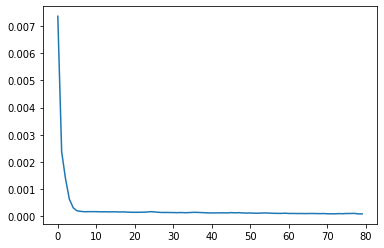

In [172]:
dic = model.history.history   
plt.plot(dic['loss'])      ### plotting the loss for the trained model

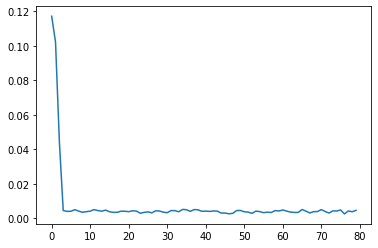

In [173]:
plt.plot(dic['val_loss'])  ### plotting the validation loss for the trained model

## Predicting the model performance 

In [174]:
### Lets Do the prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [175]:
##Transformback to original form

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [176]:
### Calculate RMSE(Root Mean Square Error) performance metrics

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))    ## RMSE of train data

0.009694359492574611

In [177]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.06781695155761999

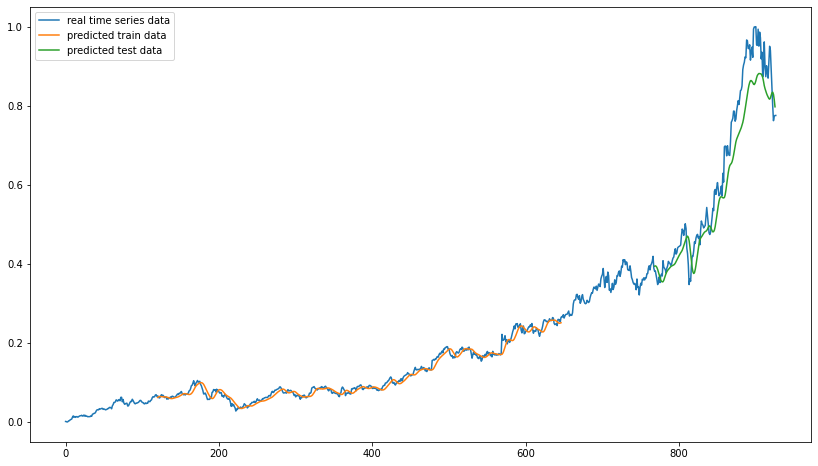

In [178]:
### Plotting 

# shift train predictions for plotting
look_back=120 ## 120 timesteps
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(14,8))
plt.plot(scaler.inverse_transform(df1_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['real time series data','predicted train data','predicted test data'])
plt.show()

## Predicting the model for future 30 weeks
#### (1 stock price per week)

In [179]:
x_input=test_data[len(test_data)-120:].reshape(1,-1)   ### separating the data of stock prices for the last 120 weeks 
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [180]:
len(temp_input)

120

In [181]:
# prediction for next 30 weeks
from numpy import array

lst_output=[]
n_steps=120
i=0
while(i<30):
    
    if(len(temp_input)>120):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7590368]
121
1 day input [0.50151527 0.48947146 0.44022741 0.42536984 0.39754991 0.3476741
 0.36203313 0.35603681 0.39492053 0.41965356 0.41883401 0.43273885
 0.45562449 0.45177269 0.46549311 0.47241823 0.47463782 0.46538386
 0.46938593 0.44818037 0.48485133 0.50844039 0.5008733  0.49792295
 0.49100467 0.49456285 0.49670049 0.52092468 0.54273129 0.5228506
 0.5005011  0.47841792 0.47431001 0.47995798 0.49868785 0.51823728
 0.54052875 0.53476808 0.58381067 0.58808935 0.57583724 0.59312952
 0.6056753  0.58895671 0.57236785 0.57507918 0.58138962 0.59682084
 0.57284592 0.62916877 0.6069046  0.69619001 0.69830714 0.69618317
 0.67333851 0.69900376 0.68293052 0.67506293 0.67430145 0.71017338
 0.75828371 0.76240875 0.76827526 0.78656808 0.78603194 0.76091647
 0.76629469 0.78771206 0.800251   0.81275917 0.80320472 0.81957841
 0.83835268 0.84013525 0.85004819 0.89133253 0.9030212  0.90993264
 0.92351651 0.92148134 0.96638184 0.96457542 0.94501916 0.94450011
 0.95416386 0.915427   0.93757158 0.

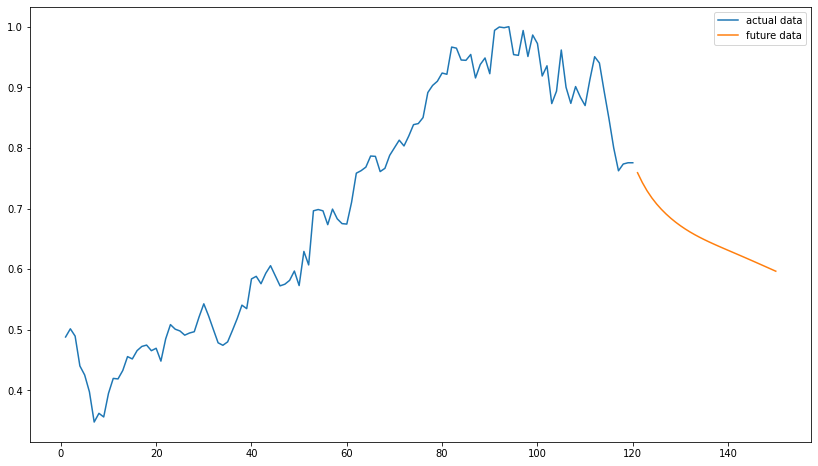

In [182]:
day_new=np.arange(1,121)
day_pred=np.arange(121,151)
plt.figure(figsize=(14,8))
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-120:]))   ## plot for actual data
plt.plot(day_pred,scaler.inverse_transform(lst_output))         ## plot for future data
plt.legend(['actual data','future data'])